 **EDA ASSIGNMENT**

    Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
    (Show the shape and column names as well.)

In [11]:
import pandas as pd


df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")


print("Shape of the dataset (rows, columns):")
print(df.shape)


print("\nColumn names in the dataset:")
print(df.columns)


print("\nFirst 10 rows of the dataset:")
print(df.head(10))


Shape of the dataset (rows, columns):
(1061, 7)

Column names in the dataset:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9  

    Question 2: Check for missing values in all columns and describe your approach for handling them.


    = To handle missing values, I would first check all columns to identify where and how many values are missing. Then I would understand the type of each column—numerical or categorical—because the handling method depends on this. For numerical columns like ex_showroom_price, I would fill missing values using the median, as it is robust to outliers and avoids losing important data. For categorical columns, I would replace missing values with the most frequent category (mode) or an “Unknown” label if needed. I would avoid dropping rows unless the number of missing values is very small, and finally recheck the dataset to ensure all missing values are properly handled.

In [10]:
import pandas as pd

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

print(df.isnull().sum())

df["ex_showroom_price"] = df["ex_showroom_price"].fillna(df["ex_showroom_price"].median())

print(df.isnull().sum())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


    Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


    = The histogram shows a right-skewed distribution of selling prices, where most bikes are concentrated in the lower to mid price range, indicating that affordable bikes are sold more frequently. As the selling price increases, the number of bikes gradually decreases, forming a long tail on the higher price side, which represents a small number of premium or high-value bikes. Overall, this trend suggests that the market is dominated by economical and mid-segment bikes, with comparatively fewer expensive models.

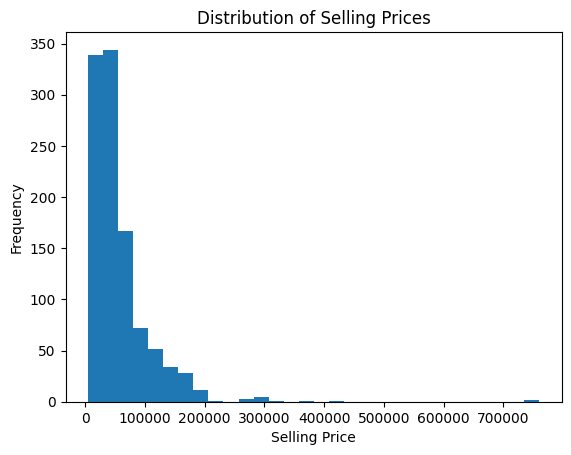

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

plt.hist(df["selling_price"], bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()


    = Observation:
    Bikes sold by dealers have a higher average selling price compared to those sold by individual sellers, indicating that dealers generally sell newer or better-maintained bikes.

    Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

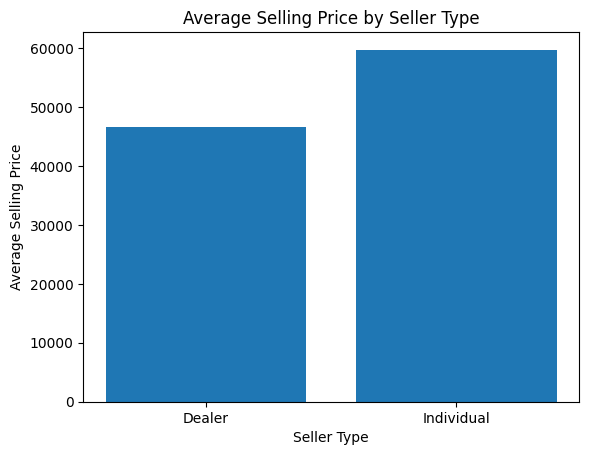

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

avg_price = df.groupby("seller_type")["selling_price"].mean()

plt.bar(avg_price.index, avg_price.values)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()


    Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


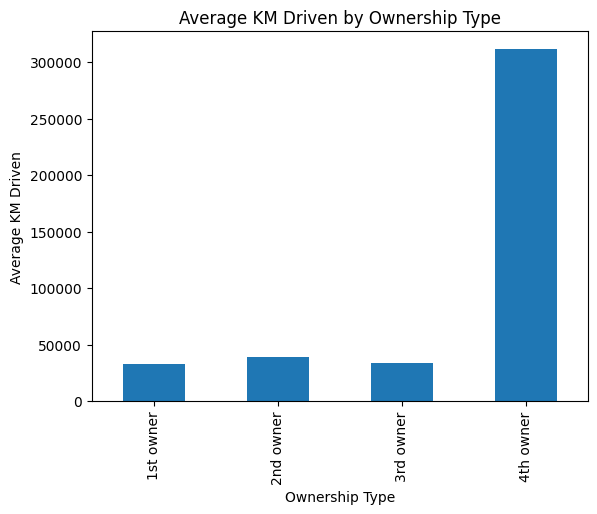

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

average_km = df.groupby("owner")["km_driven"].mean()

plt.figure()
average_km.plot(kind="bar")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.title("Average KM Driven by Ownership Type")
plt.show()


    Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [6]:
import pandas as pd

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

before_stats = df["km_driven"].describe()

Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

after_stats = df_cleaned["km_driven"].describe()

print("Before removing outliers:")
print(before_stats)

print("\nAfter removing outliers:")
print(after_stats)


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


    Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


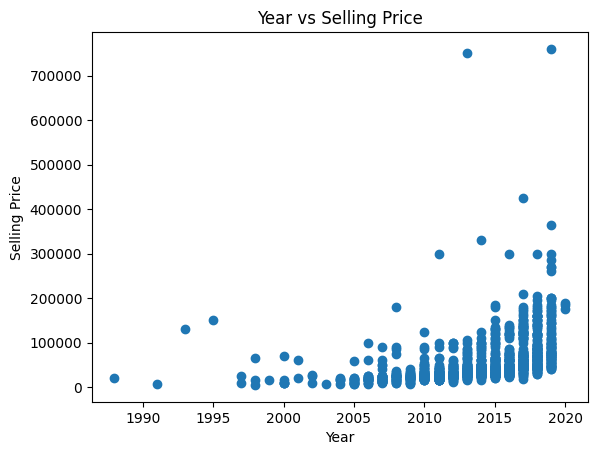

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

plt.figure()
plt.scatter(df["year"], df["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()


    Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [4]:
import pandas as pd

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

seller_encoded = pd.get_dummies(data["seller_type"], prefix="seller")

data = pd.concat([data.drop("seller_type", axis=1), seller_encoded], axis=1)

print(data.head(5))

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


    Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


    = The heatmap shows that selling_price has a strong positive correlation with ex_showroom_price, meaning bikes with higher original prices tend to sell for more, while it has a moderate positive correlation with year, indicating newer bikes usually have higher selling prices; km_driven is negatively correlated with selling_price, showing that bikes used more tend to lose value, and year and km_driven also show a slight negative relationship, suggesting older bikes are generally driven more.

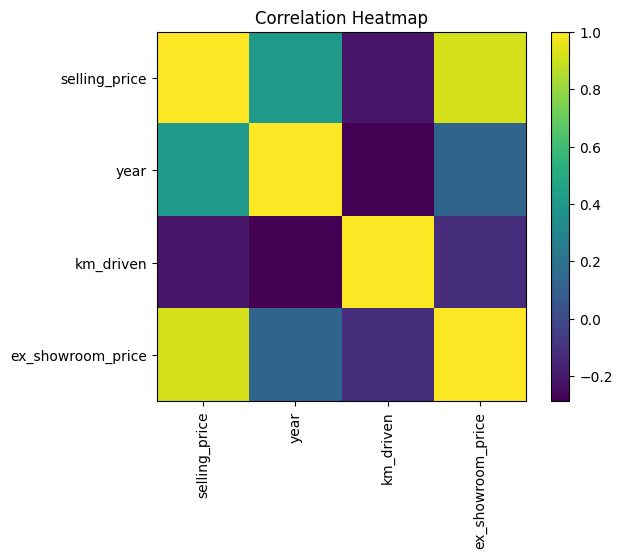

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

numeric_data = data.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_data.corr()

plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)),
           correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)),
           correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


    Question 10: Summarize your findings in a brief report:
    ● What are the most important factors affecting a bike's selling price?
    ● Mention any data cleaning or feature engineering you performed.


    = Brief Report :
    The analysis shows that a bike’s selling price is most strongly influenced by its ex-showroom price, which has a high positive correlation, indicating that bikes with higher original prices tend to retain higher resale value. The year of manufacture also plays an important role, as newer bikes generally sell for more, while km_driven negatively affects the selling price, meaning bikes that have been used more tend to lose value. Seller type and ownership can also influence price, but their impact is secondary compared to price, age, and usage. For data preparation, basic data cleaning involved selecting only numeric columns for correlation analysis, and feature engineering included converting the categorical seller_type column into numeric form using one-hot encoding to make it suitable for analysis and modeling.

In [12]:
import pandas as pd

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

data = data.dropna()

data_encoded = pd.get_dummies(data, columns=["seller_type"], prefix="seller")

numeric_data = data_encoded.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_data.corr()

important_factors = correlation_matrix["selling_price"].sort_values(ascending=False)
print(important_factors.head())


selling_price        1.000000
ex_showroom_price    0.918583
year                 0.350654
km_driven           -0.194093
Name: selling_price, dtype: float64


    = This example shows feature engineering by converting seller_type into numeric form using one-hot encoding and data cleaning by removing missing values. It then calculates correlations to identify the most important factors affecting the bike’s selling price, such as ex-showroom price, year, and kilometers driven.


---















